In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv('studentdata.csv')

In [3]:
df.head()

,gender,StageID,Topic,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction,Class
0,M,lowerlevel,IT,Father,15,16,2,20,Good,M
1,M,lowerlevel,IT,Father,20,20,3,25,Good,M
2,M,lowerlevel,IT,Father,10,7,0,30,Bad,L
3,M,lowerlevel,IT,Father,30,25,5,35,Bad,L
4,M,lowerlevel,IT,Father,40,50,12,50,Bad,M


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   StageID                   464 non-null    object
 2   Topic                     480 non-null    object
 3   Relation                  435 non-null    object
 4   raisedhands               480 non-null    int64 
 5   VisITedResources          480 non-null    int64 
 6   AnnouncementsView         480 non-null    int64 
 7   Discussion                480 non-null    int64 
 8   ParentschoolSatisfaction  458 non-null    object
 9   Class                     480 non-null    int32 
dtypes: int32(1), int64(4), object(5)
memory usage: 35.8+ KB


In [6]:
df.isnull().mean()*100

gender                      0.000000
StageID                     3.333333
Topic                       0.000000
Relation                    9.375000
raisedhands                 0.000000
VisITedResources            0.000000
AnnouncementsView           0.000000
Discussion                  0.000000
ParentschoolSatisfaction    4.583333
Class                       0.000000
dtype: float64

<AxesSubplot:>

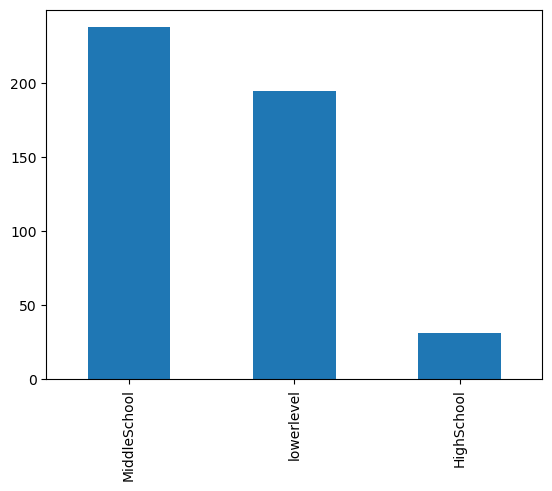

In [7]:

df['StageID'].value_counts().plot(kind='bar')

<AxesSubplot:>

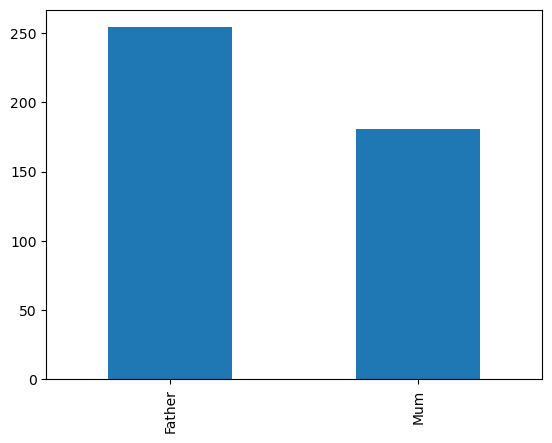

In [8]:
df['Relation'].value_counts().plot(kind='bar')

<AxesSubplot:>

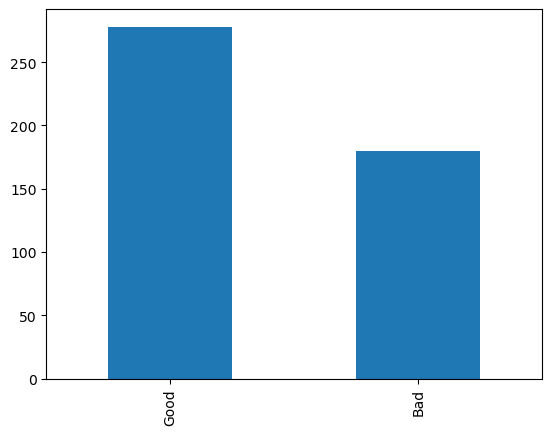

In [9]:
df['ParentschoolSatisfaction'].value_counts().plot(kind='bar')

In [10]:
mode=df['StageID'].mode()

Text(0.5, 1.0, 'StageID')

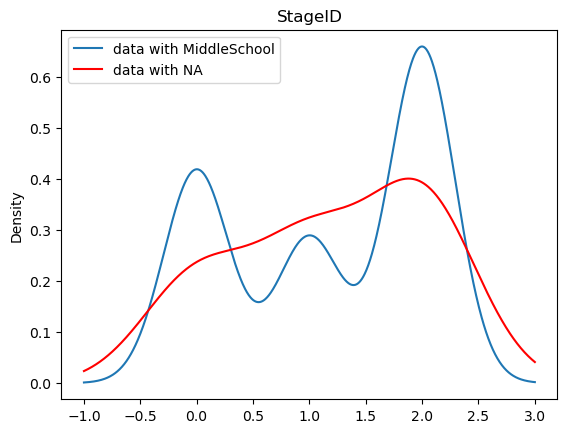

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['StageID']=='MiddleSchool']['Class'].plot(kind='kde', ax=ax)

df[df['StageID'].isnull()]['Class'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['data with MiddleSchool', 'data with NA']
ax.legend(lines, labels, loc='best')

plt.title('StageID')

In [12]:
print(df['Relation'].mode())
df['ParentschoolSatisfaction'].mode()

0    Father
Name: Relation, dtype: object


0    Good
Name: ParentschoolSatisfaction, dtype: object

Text(0.5, 1.0, 'Relation')

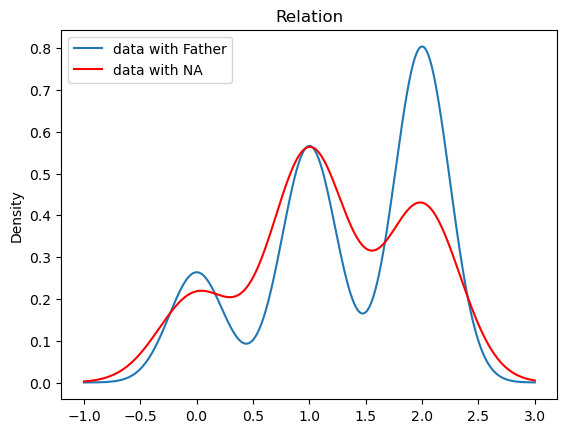

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['Relation']=='Father']['Class'].plot(kind='kde', ax=ax)

df[df['Relation'].isnull()]['Class'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['data with Father', 'data with NA']
ax.legend(lines, labels, loc='best')

plt.title('Relation')

Text(0.5, 1.0, 'Relation')

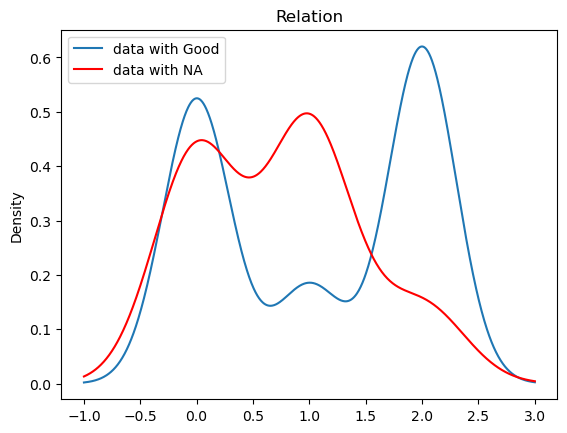

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['ParentschoolSatisfaction']=='Good']['Class'].plot(kind='kde', ax=ax)

df[df['ParentschoolSatisfaction'].isnull()]['Class'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['data with Good', 'data with NA']
ax.legend(lines, labels, loc='best')

plt.title('Relation')

In [15]:
def fill_categorical_columns_with_mode(data):
    filled_data = data.copy()
    
    for column in filled_data.columns:
        if filled_data[column].dtype == 'object' and filled_data[column].isnull().any():
            filled_data[column].fillna(filled_data[column].mode()[0], inplace=True)
    
    return filled_data

In [16]:
filled_data=fill_categorical_columns_with_mode(df)

In [17]:
filled_data.isnull().mean()*100

gender                      0.0
StageID                     0.0
Topic                       0.0
Relation                    0.0
raisedhands                 0.0
VisITedResources            0.0
AnnouncementsView           0.0
Discussion                  0.0
ParentschoolSatisfaction    0.0
Class                       0.0
dtype: float64

In [18]:
df.isnull().mean()*100

gender                      0.000000
StageID                     3.333333
Topic                       0.000000
Relation                    9.375000
raisedhands                 0.000000
VisITedResources            0.000000
AnnouncementsView           0.000000
Discussion                  0.000000
ParentschoolSatisfaction    4.583333
Class                       0.000000
dtype: float64

# Using Simple Imputer


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Class']),df['Class'],test_size=0.2)

In [20]:

from sklearn.impute import SimpleImputer

In [21]:
si= SimpleImputer(strategy='most_frequent')

In [22]:
X_train = si.fit_transform(X_train)
X_test = si.transform(X_train)

C:\Users\Alina\anaconda3\envs\tesnorflow\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [23]:
si.statistics_

array(['M', 'MiddleSchool', 'IT', 'Father', 10, 80, 12, 40, 'Good'],
      dtype=object)

# Missing value Imputation

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Class']),df['Class'],test_size=0.2)

In [25]:

from sklearn.impute import SimpleImputer

In [26]:
si = SimpleImputer(strategy='constant',fill_value='Missing')

In [27]:
X_train = si.fit_transform(X_train)
X_test = si.transform(X_train)

C:\Users\Alina\anaconda3\envs\tesnorflow\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [28]:
si.statistics_

array(['Missing', 'Missing', 'Missing', 'Missing', 'Missing', 'Missing',
       'Missing', 'Missing', 'Missing'], dtype=object)